In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def der(z: list, t, a: float, b: float, c: float, d: float) -> list:
    '''
    Returns a list of the values of the derivatives given the parameters
    
        Parameters:
            z (list): List containing the initial conditions of x and y
            t: Unused np.linspace parameter
            a (float): Coefficient for the x term in the derivative of x
            b (float): Coefficient for the y term in the derivative of x
            c (float): Coefficient for the x term in the derivative of y
            d (float): Coefficient for the y term in the derivative of y
            
        Returns:
            dydt (list): List of the values of the derivates
    '''
    
    
    x = z[0]
    y = z[1]
    dydt = [a * x + b * y, c * x + d * y]
    return dydt

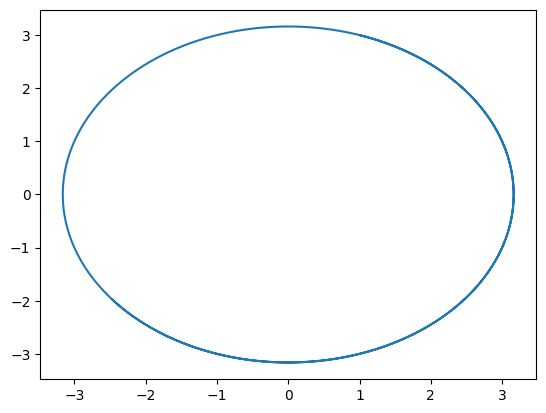

In [17]:
# Parameters
a = 0
b = 1
c = -1
d = 0
# Initial Conditions
x0 = [1, 3]
# Time interval and number of steps
t = np.linspace(0, 10, 10000)
# Solve
sol = odeint(der, x0, t, args=(a, b, c, d))
# Plot
plt.plot(sol[:, 0], sol[:, 1])